In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "D:/Dataset/TRAIN/Trash"
CATEGORIES = ["cans","glass_bottles","plastic bottles","plastic_covers","plastic_cups"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

In [2]:
print(img_array)

[[ 73  59  29 ...  84  75  86]
 [ 82 165  67 ... 117  76  80]
 [120 136  80 ...  97  71  92]
 ...
 [136 127 109 ... 108 116 104]
 [145 146 128 ... 110 112 114]
 [122 137 130 ... 126 129 120]]


In [3]:
print(img_array.shape)

(330, 341)


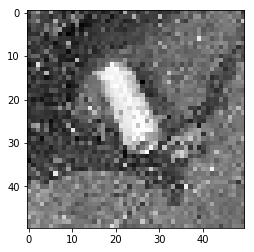

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except EXCEPTION as e:
                pass

create_training_data()

In [6]:
print(len(training_data))

539


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
1
4
2
2
3
3
3
3
2


In [9]:
X = []
Y = []

In [10]:
for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
import pickle

pickle_out= open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out= open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [13]:
X[1]

array([[[153],
        [182],
        [159],
        ...,
        [210],
        [203],
        [204]],

       [[183],
        [159],
        [174],
        ...,
        [214],
        [212],
        [196]],

       [[162],
        [136],
        [164],
        ...,
        [178],
        [211],
        [201]],

       ...,

       [[172],
        [220],
        [194],
        ...,
        [229],
        [214],
        [230]],

       [[226],
        [119],
        [152],
        ...,
        [221],
        [218],
        [225]],

       [[170],
        [132],
        [202],
        ...,
        [196],
        [218],
        [222]]], dtype=uint8)

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle","rb"))
Y = pickle.load(open("Y.pickle","rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(5))
model.add(Activation('sigmoid'))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
IMG_SIZE = 50
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Y = np.array(Y)

model.fit(X, Y, batch_size=32, validation_split=0.1, epochs=50)

Train on 485 samples, validate on 54 samples
Epoch 1/50
485/485 [==============================] - 2s 5ms/sample - loss: 1.4331 - accuracy: 0.4247 - val_loss: 1.4612 - val_accuracy: 0.3519
Epoch 2/50
485/485 [==============================] - 1s 2ms/sample - loss: 1.3309 - accuracy: 0.4309 - val_loss: 1.4167 - val_accuracy: 0.3519
Epoch 3/50
485/485 [==============================] - 1s 2ms/sample - loss: 1.3022 - accuracy: 0.4309 - val_loss: 1.3803 - val_accuracy: 0.3519
Epoch 4/50
485/485 [==============================] - 1s 2ms/sample - loss: 1.2184 - accuracy: 0.4454 - val_loss: 1.4836 - val_accuracy: 0.3704
Epoch 5/50
485/485 [==============================] - 1s 2ms/sample - loss: 1.2257 - accuracy: 0.4412 - val_loss: 1.3597 - val_accuracy: 0.3333
Epoch 6/50
485/485 [==============================] - 1s 2ms/sample - loss: 1.1097 - accuracy: 0.5052 - val_loss: 1.3800 - val_accuracy: 0.3704
Epoch 7/50
485/485 [==============================] - 1s 2ms/sample - loss: 1.0077 - accura

In [4]:
!pip install torchvision

You should consider upgrading via the 'C:\Users\jai t l harish\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install torch

You should consider upgrading via the 'C:\Users\jai t l harish\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

model = models.resnet50(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\jai t l harish/.cache\torch\checkpoints\resnet50-19c8e357.pth
100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device);

In [3]:
import torch
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [7]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

In [8]:
data_dir = 'E:/dataset_facial'
train_data = datasets.ImageFolder(data_dir + '/TRAIN/', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/TEST/', transform=test_transforms)

In [9]:
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [10]:
print(len(train_data))
print(len(train_loader))

137
4


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0))) 

In [12]:
classes=['identified','non-identified']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: list index out of range

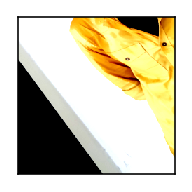

In [13]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(30):
    ax = fig.add_subplot(2, 30/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [ ]:
batch = next(iter(train_loader))
print(batch[0].shape)
plt.imshow(batch[0][0].permute(1, 2, 0))
print(batch[1][0])

In [12]:
n_epochs = 10
valid_loss_min = np.Inf # track change in validation loss
for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_waste.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.382380 	Validation Loss: 0.211035
Validation loss decreased (inf --> 0.211035).  Saving model ...
Epoch: 2 	Training Loss: 0.191634 	Validation Loss: 0.156329
Validation loss decreased (0.211035 --> 0.156329).  Saving model ...
Epoch: 3 	Training Loss: 0.175749 	Validation Loss: 0.136602
Validation loss decreased (0.156329 --> 0.136602).  Saving model ...
Epoch: 4 	Training Loss: 0.162266 	Validation Loss: 0.116200
Validation loss decreased (0.136602 --> 0.116200).  Saving model ...
Epoch: 5 	Training Loss: 0.136388 	Validation Loss: 0.112547
Validation loss decreased (0.116200 --> 0.112547).  Saving model ...
Epoch: 6 	Training Loss: 0.129414 	Validation Loss: 0.120933
Epoch: 7 	Training Loss: 0.166135 	Validation Loss: 0.105635
Validation loss decreased (0.112547 --> 0.105635).  Saving model ...
Epoch: 8 	Training Loss: 0.112435 	Validation Loss: 0.105561
Validation loss decreased (0.105635 --> 0.105561).  Saving model ...
Epoch: 9 	Training Loss: 0.121156 

In [21]:
model.load_state_dict(torch.load('model_waste.pt'))

<All keys matched successfully>

In [25]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))

#test_loss = 0.0
#class_correct = list(0. for i in range(10))
#class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(2):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))
#print(class_correct,class_total)
for i in range(2):    
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.295096

Test Accuracy of     N: 90% ( 9/10)
Test Accuracy of     T: 100% (18/18)

Test Accuracy (Overall): 96% (27/28)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

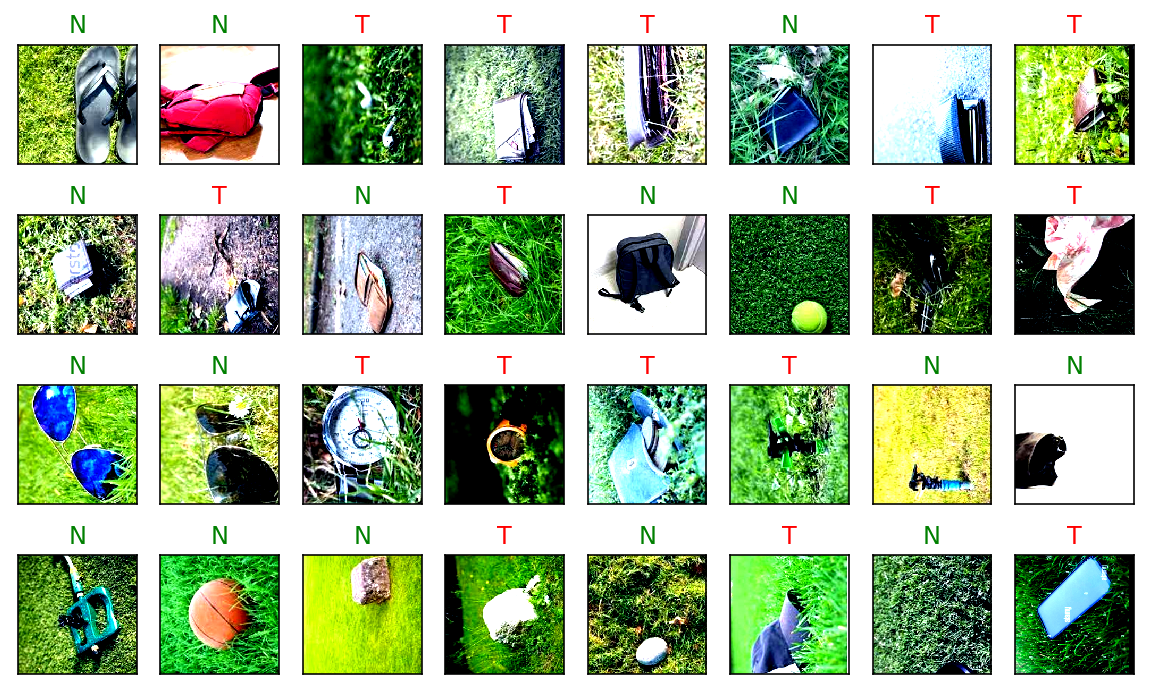

In [24]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(10, 6))
for idx in np.arange(32):
    ax = fig.add_subplot(4, 32/4, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
#    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
 #                color=("green" if preds[idx]==labels[idx].item() else "red"))
    ax.set_title("{}".format(classes[preds[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))


In [83]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [36]:
torch.load.__doc__

"Loads an object saved with :func:`torch.save` from a file.\n\n    :func:`torch.load` uses Python's unpickling facilities but treats storages,\n    which underlie tensors, specially. They are first deserialized on the\n    CPU and are then moved to the device they were saved from. If this fails\n    (e.g. because the run time system doesn't have certain devices), an exception\n    is raised. However, storages can be dynamically remapped to an alternative\n    set of devices using the :attr:`map_location` argument.\n\n    If :attr:`map_location` is a callable, it will be called once for each serialized\n    storage with two arguments: storage and location. The storage argument\n    will be the initial deserialization of the storage, residing on the CPU.\n    Each serialized storage has a location tag associated with it which\n    identifies the device it was saved from, and this tag is the second\n    argument passed to :attr:`map_location`. The builtin location tags are ``'cpu'``\n    

In [24]:
data_dir = "D:/dataset/Trash_images/"

In [27]:
Name=[]
for file in os.listdir(data_dir):
    Name+=[file]
    
print(Name)
print(len(Name))

['Non_trash', 'Trash']
2


In [28]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [33]:
dataset=[]
count=0
for file in os.listdir(data_dir):
    path=os.path.join(data_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(60,60))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1

PermissionError: [Errno 13] Permission denied: 'D:/dataset/Trash_images/Trash\\cans'

In [31]:
n=len(dataset)
print(n)

121


In [42]:
num=[]
for i in range(n):
    num+=[i]
random.shuffle(num)
print(num[0:5])

[100, 81, 55, 27, 33]


In [43]:
data,labels=zip(*dataset)
data=np.array(data)
labels=np.array(labels)

train=data[num[0:(n//10)*8]]
trainlabel=labels[num[0:(n//10)*8]]

test=data[num[(n//10)*8:]]
testlabel=labels[num[(n//10)*8:]]

In [44]:
trainlabel2=to_categorical(trainlabel)

In [45]:
trainx,testx,trainy,testy=train_test_split(train,trainlabel2,test_size=0.2,random_state=44)

In [46]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(70, 60, 60, 3)
(18, 60, 60, 3)
(70, 1)
(18, 1)


In [47]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [48]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(60,60,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [49]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(6, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [50]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Train for 3 steps, validate on 18 samples
Epoch 1/30
3/3 [==============================] - 10s 3s/step - loss: 0.9646 - accuracy: 0.5571 - val_loss: 0.2240 - val_accuracy: 1.0000
Epoch 2/30
3/3 [==============================] - 1s 419ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 1s 427ms/step - loss: 1.4545e-04 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 1s 423ms/step - loss: 1.3416e-05 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 1s 427ms/step - loss: 2.3587e-06 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 1s 428ms/step - loss: 4.7252e-07 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 1s 423ms/step - loss: 2.3342e-07 - accuracy: 1.0000 - 

In [52]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      18.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00      18.0
   macro avg       0.00      0.00      0.00      18.0
weighted avg       0.00      0.00      0.00      18.0



c:\users\jai t l harish\anaconda3\envs\tensorflow1\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jai t l harish\anaconda3\envs\tensorflow1\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


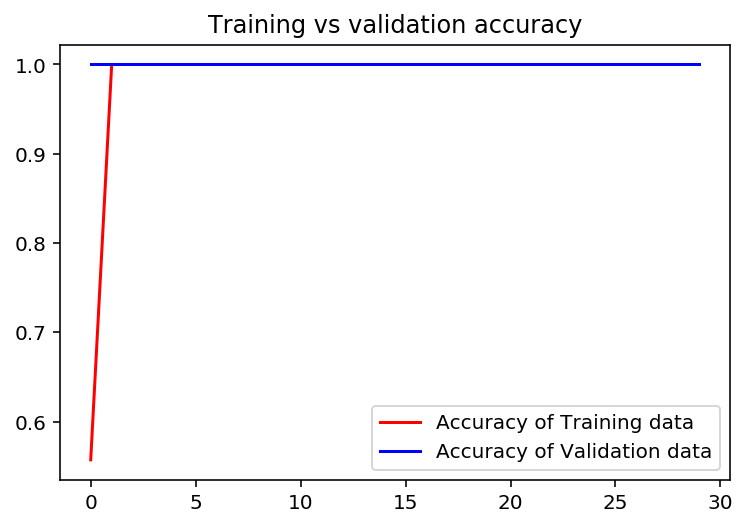

<Figure size 432x288 with 0 Axes>

In [53]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

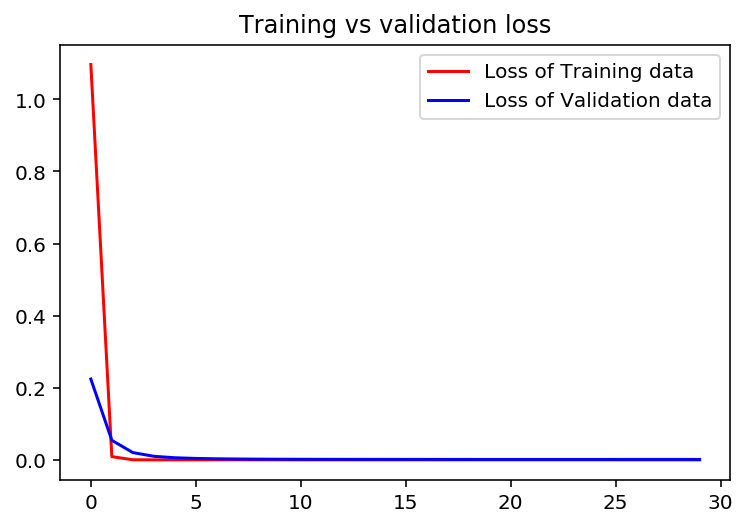

<Figure size 432x288 with 0 Axes>

In [54]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_t=torch.load('model_waste.pt')

model_t.eval()

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [10]:
import torch
import torch.nn as nn

class TempModel(nn.Module):
    def __init__(self):
        self.conv1 = nn.Conv2d(3, 5, (3, 3))
    def forward(self, inp):
        return self.conv1(inp)

model_t = TempModel()
model_t.load_state_dict(torch.load("model_waste.pt"))
model_t.eval()

AttributeError: cannot assign module before Module.__init__() call

In [13]:
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [23]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [17]:
to_pil = transforms.ToPILImage()

In [16]:
image = to_pil('harish.jpg')
    index = predict_image('harish.jpg')


IndentationError: unexpected indent (<ipython-input-16-e109f6c1e4d3>, line 2)

In [17]:
image = to_pil('harish.jpg')
index = predict_image('harish.jpg')
image = to_pil('harish.jpg')
    index = predict_image('harish.jpg')image = to_pil('harish.jpg')
    index = predict_image('harish.jpg')

TypeError: pic should be Tensor or ndarray. Got <class 'str'>.

In [18]:
image = to_pil(images[1])
    index = predict_image(images[1])

IndentationError: unexpected indent (<ipython-input-18-ac970c863b5f>, line 2)

In [22]:
import tensorflow as tensor
tensor.cpu()
image = to_pil(images[1])
index = predict_image(images[1])

AttributeError: module 'tensorflow' has no attribute 'cpu'